<a href="https://colab.research.google.com/github/ghanalk1/Global-Terrorism-Analysis-EDA/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#**Importing data and exploring it.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading file with encoding option set to 'ISO-8859-1'
df = pd.read_csv('/content/drive/MyDrive/dat/Global Terrorism Data.csv', encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.shape

(181691, 135)

In [6]:
# selecting important columns.
df = df[['eventid', 'iyear', 'imonth', 'iday', 'extended', 'resolution', 'country_txt', 'region_txt', 'city', 'latitude', 
         'longitude', 'success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'nkill', 'nwound', 'gname']]

In [7]:
# renaming columns.
df.rename(columns={'eventid':'Id', 'iyear':'Year', 'iday':'Day', 'imonth':'Month', 'extended':'Extended', 'resolution':'Resolution', 
                   'country_txt':'Country', 'region_txt':'Region', 'city':'City', 'latitude':'Latitude', 'longitude':'Longitude', 'success':'Success', 
                   'suicide':'Suicide', 'attacktype1_txt':'Attack_type', 'targtype1_txt':'Target', 'weaptype1_txt':'Weapon_type', 'nkill':'Number_of_killed', 
                   'nwound':'Number_of_wounded', 'gname':'Terrorist_group'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
df.head()

,Id,Year,Month,Day,Extended,Resolution,Country,Region,City,Latitude,Longitude,Success,Suicide,Attack_type,Target,Weapon_type,Number_of_killed,Number_of_wounded,Terrorist_group
0,197000000001,1970,7,2,0,NaN,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,Unknown,1.0,0.0,MANO-D
1,197000000002,1970,0,0,0,NaN,Mexico,North America,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,23rd of September Communist League
2,197001000001,1970,1,0,0,NaN,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Unknown,1.0,0.0,Unknown
3,197001000002,1970,1,0,0,NaN,Greece,Western Europe,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN,Unknown
4,197001000003,1970,1,0,0,NaN,Japan,East Asia,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,Unknown


In [9]:
# dropping some columns.
df.drop(columns=['Id', 'Resolution'], inplace=True)

In [10]:
df.head()

,Year,Month,Day,Extended,Country,Region,City,Latitude,Longitude,Success,Suicide,Attack_type,Target,Weapon_type,Number_of_killed,Number_of_wounded,Terrorist_group
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,Unknown,1.0,0.0,MANO-D
1,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,23rd of September Communist League
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Unknown,1.0,0.0,Unknown
3,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN,Unknown
4,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,Unknown


# **Data Cleaning**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               181691 non-null  int64  
 1   Month              181691 non-null  int64  
 2   Day                181691 non-null  int64  
 3   Extended           181691 non-null  int64  
 4   Country            181691 non-null  object 
 5   Region             181691 non-null  object 
 6   City               181257 non-null  object 
 7   Latitude           177135 non-null  float64
 8   Longitude          177134 non-null  float64
 9   Success            181691 non-null  int64  
 10  Suicide            181691 non-null  int64  
 11  Attack_type        181691 non-null  object 
 12  Target             181691 non-null  object 
 13  Weapon_type        181691 non-null  object 
 14  Number_of_killed   171378 non-null  float64
 15  Number_of_wounded  165380 non-null  float64
 16  Te

In [12]:
# looking for null values.
df.isna().sum()

Year                     0
Month                    0
Day                      0
Extended                 0
Country                  0
Region                   0
City                   434
Latitude              4556
Longitude             4557
Success                  0
Suicide                  0
Attack_type              0
Target                   0
Weapon_type              0
Number_of_killed     10313
Number_of_wounded    16311
Terrorist_group          0
dtype: int64

In [13]:
df['Extended'].value_counts()

0    173452
1      8239
Name: Extended, dtype: int64

In [14]:
# dropping 'Extended' column
df.drop(columns=['Extended'], inplace=True)

In [15]:
# dropping 'latitude' and 'longitude' and 'number of wounded' columns
df.drop(columns=['Latitude', 'Longitude', 'Number_of_wounded'], inplace=True)

In [16]:
df.head(2)

,Year,Month,Day,Country,Region,City,Success,Suicide,Attack_type,Target,Weapon_type,Number_of_killed,Terrorist_group
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,Unknown,1.0,MANO-D
1,1970,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,23rd of September Communist League


In [17]:
df.isna().sum()

Year                    0
Month                   0
Day                     0
Country                 0
Region                  0
City                  434
Success                 0
Suicide                 0
Attack_type             0
Target                  0
Weapon_type             0
Number_of_killed    10313
Terrorist_group         0
dtype: int64

In [18]:
df[df['Number_of_killed'].isna()]

,Year,Month,Day,Country,Region,City,Success,Suicide,Attack_type,Target,Weapon_type,Number_of_killed,Terrorist_group
3,1970,1,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,Unknown
4,1970,1,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,Unknown
15,1970,1,10,East Germany (GDR),Eastern Europe,Berlin,1,0,Bombing/Explosion,Government (General),Explosives,NaN,Commune 1
34,1970,1,28,East Germany (GDR),Eastern Europe,Berlin,1,0,Facility/Infrastructure Attack,Police,Incendiary,NaN,Unknown
95,1970,2,28,Jordan,Middle East & North Africa,Hebron,1,0,Armed Assault,Tourists,Firearms,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181636,2017,12,29,Afghanistan,South Asia,Darzab district,1,0,Hostage Taking (Kidnapping),Religious Figures/Institutions,Unknown,NaN,Khorasan Chapter of the Islamic State
181640,2017,12,29,Iraq,Middle East & North Africa,Baaj district,0,0,Armed Assault,Military,Firearms,NaN,Unknown
181662,2017,12,30,Philippines,Southeast Asia,Tarragona,1,0,Bombing/Explosion,Military,Explosives,NaN,New People's Army (NPA)
181666,2017,12,30,Nigeria,Sub-Saharan Africa,Konduga district,1,0,Facility/Infrastructure Attack,Private Citizens & Property,Unknown,NaN,Boko Haram


In [19]:
df[df['City'].isna()]

,Year,Month,Day,Country,Region,City,Success,Suicide,Attack_type,Target,Weapon_type,Number_of_killed,Terrorist_group
79458,2006,1,19,Thailand,Southeast Asia,NaN,1,0,Armed Assault,Private Citizens & Property,Firearms,1.0,Unknown
79459,2006,1,19,Thailand,Southeast Asia,NaN,1,0,Armed Assault,Private Citizens & Property,Firearms,1.0,Unknown
79550,2006,1,24,Thailand,Southeast Asia,NaN,1,0,Armed Assault,Government (General),Firearms,1.0,Unknown
79583,2006,1,27,Thailand,Southeast Asia,NaN,1,0,Armed Assault,Private Citizens & Property,Firearms,1.0,Unknown
79952,2006,2,21,Thailand,Southeast Asia,NaN,1,0,Armed Assault,Police,Firearms,2.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103120,2011,9,17,Libya,Middle East & North Africa,NaN,1,0,Armed Assault,Airports & Aircraft,Firearms,0.0,Unknown
103403,2011,10,10,Iraq,Middle East & North Africa,NaN,0,0,Bombing/Explosion,Utilities,Explosives,0.0,Unknown
103453,2011,10,14,Indonesia,Southeast Asia,NaN,1,0,Armed Assault,Military,Firearms,3.0,Unknown
103530,2011,10,21,Indonesia,Southeast Asia,NaN,1,0,Armed Assault,Private Citizens & Property,Firearms,3.0,Unknown


In [20]:
# filling nan values in City column with some values.
df.fillna(value={'City':'Unknown'}, inplace=True)

In [21]:
df.isna().sum()

Year                    0
Month                   0
Day                     0
Country                 0
Region                  0
City                    0
Success                 0
Suicide                 0
Attack_type             0
Target                  0
Weapon_type             0
Number_of_killed    10313
Terrorist_group         0
dtype: int64

In [22]:
# filling nan values in Number of killed column with 0.
df.fillna(value={'Number_of_killed':0}, inplace=True)

# we could have used fillna() for both columns at once also.

In [23]:
df.isna().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
City                0
Success             0
Suicide             0
Attack_type         0
Target              0
Weapon_type         0
Number_of_killed    0
Terrorist_group     0
dtype: int64

In [24]:
df.head()

,Year,Month,Day,Country,Region,City,Success,Suicide,Attack_type,Target,Weapon_type,Number_of_killed,Terrorist_group
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,Unknown,1.0,MANO-D
1,1970,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,23rd of September Communist League
2,1970,1,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,1.0,Unknown
3,1970,1,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Explosives,0.0,Unknown
4,1970,1,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,0.0,Unknown


# **Exploratory Data Analysis**

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,181691.0,2002.638997,13.259430,1970.0,1991.0,2009.0,2014.0,2017.0
Month,181691.0,6.467277,3.388303,0.0,4.0,6.0,9.0,12.0
Day,181691.0,15.505644,8.814045,0.0,8.0,15.0,23.0,31.0
Success,181691.0,0.889598,0.313391,0.0,1.0,1.0,1.0,1.0
Suicide,181691.0,0.036507,0.187549,0.0,0.0,0.0,0.0,1.0
Number_of_killed,181691.0,2.266860,11.227057,0.0,0.0,0.0,2.0,1570.0


In [36]:
len(df['Year'].value_counts())

47

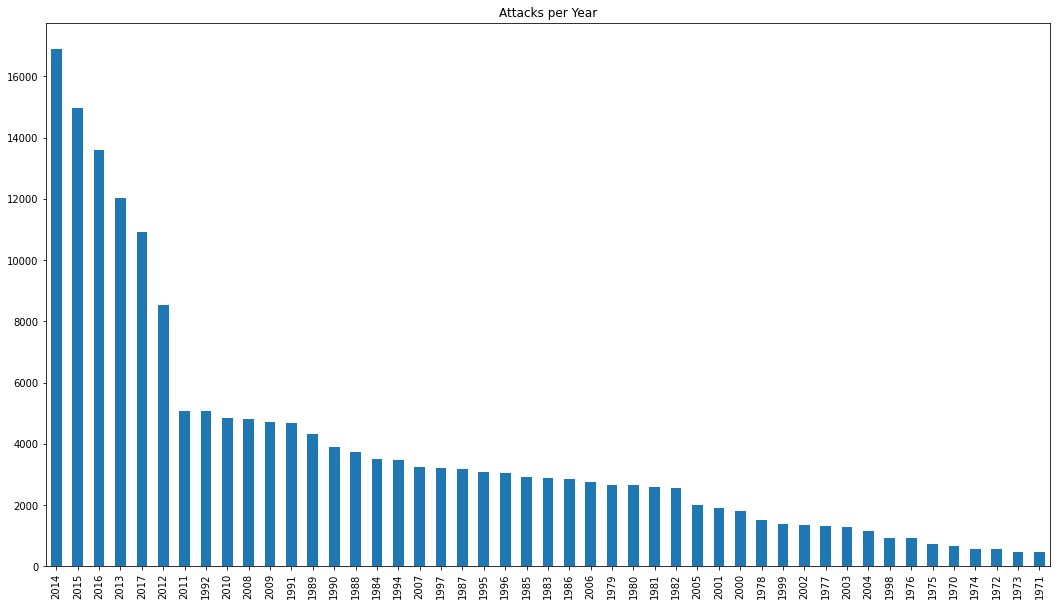

In [37]:
# Terrorist attacks per year
df['Year'].value_counts().plot(kind='bar', figsize=[18,10], title='Attacks per Year')

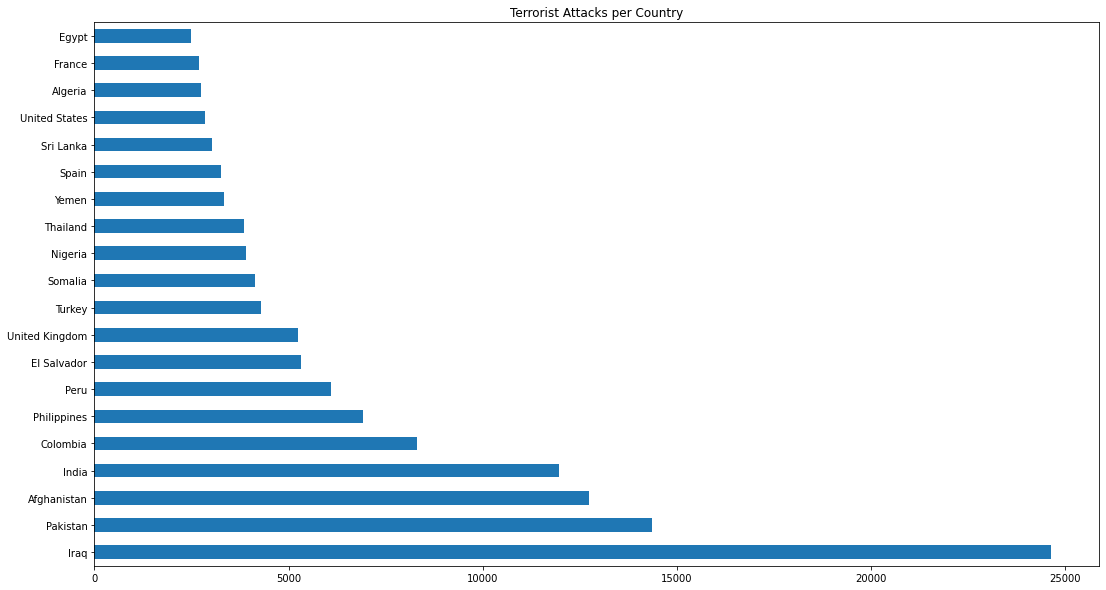

In [38]:
# Terrorist attacks country wise
df['Country'].value_counts()[:20].plot(kind='barh', figsize=[18,10], title='Terrorist Attacks per Country')

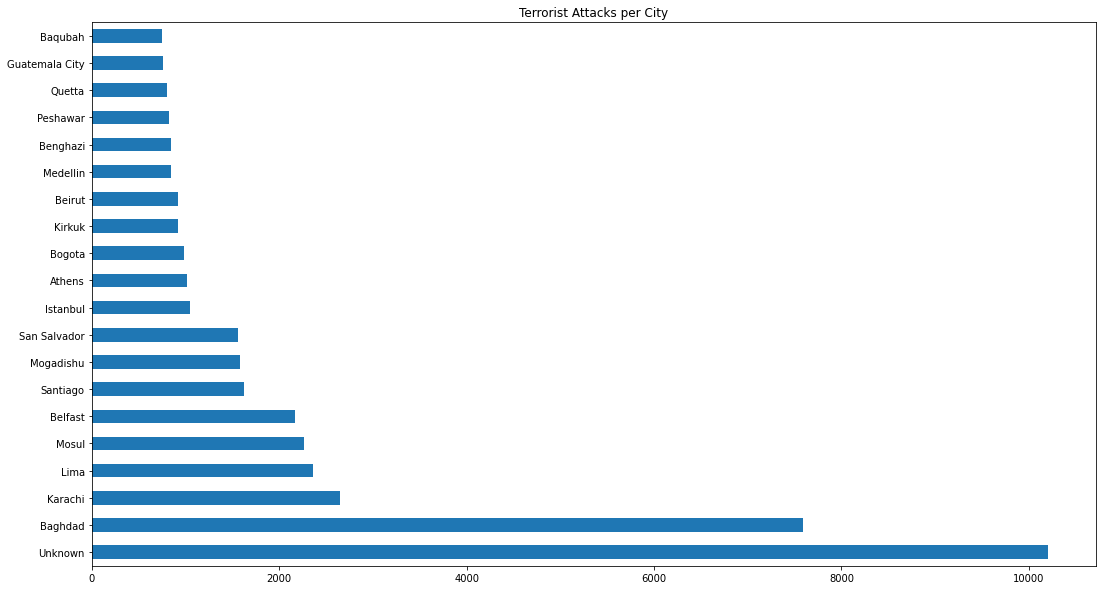

In [39]:
# Terrorist attacks city wise
df['City'].value_counts()[:20].plot(kind='barh', figsize=[18,10], title='Terrorist Attacks per City')

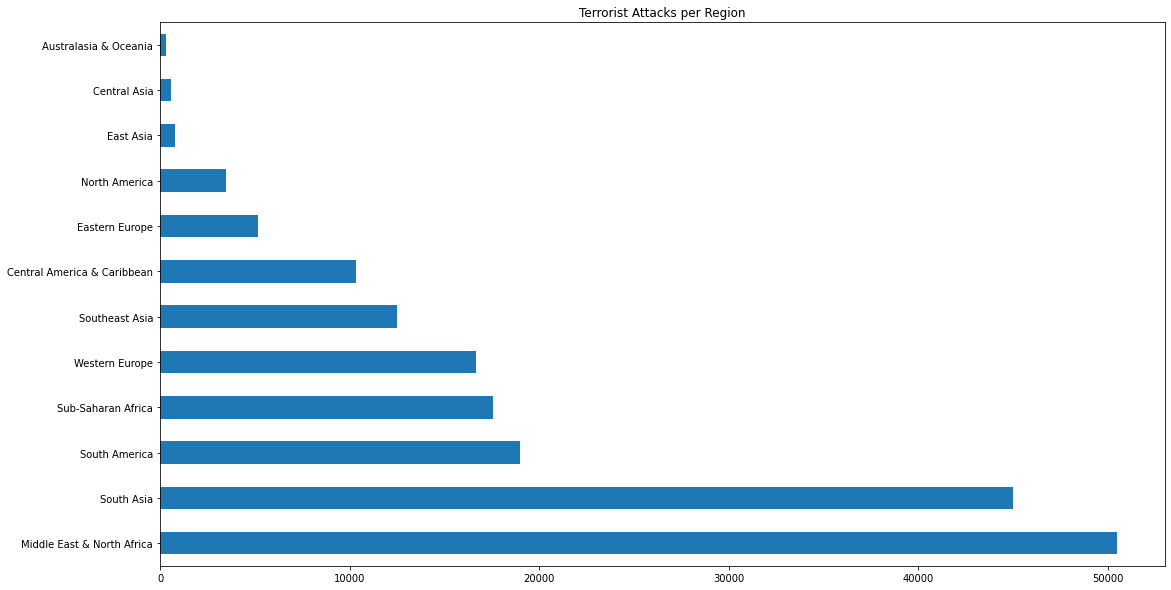

In [40]:
# attacks region wise
df['Region'].value_counts().plot(kind='barh', figsize=[18,10], title='Terrorist Attacks per Region')

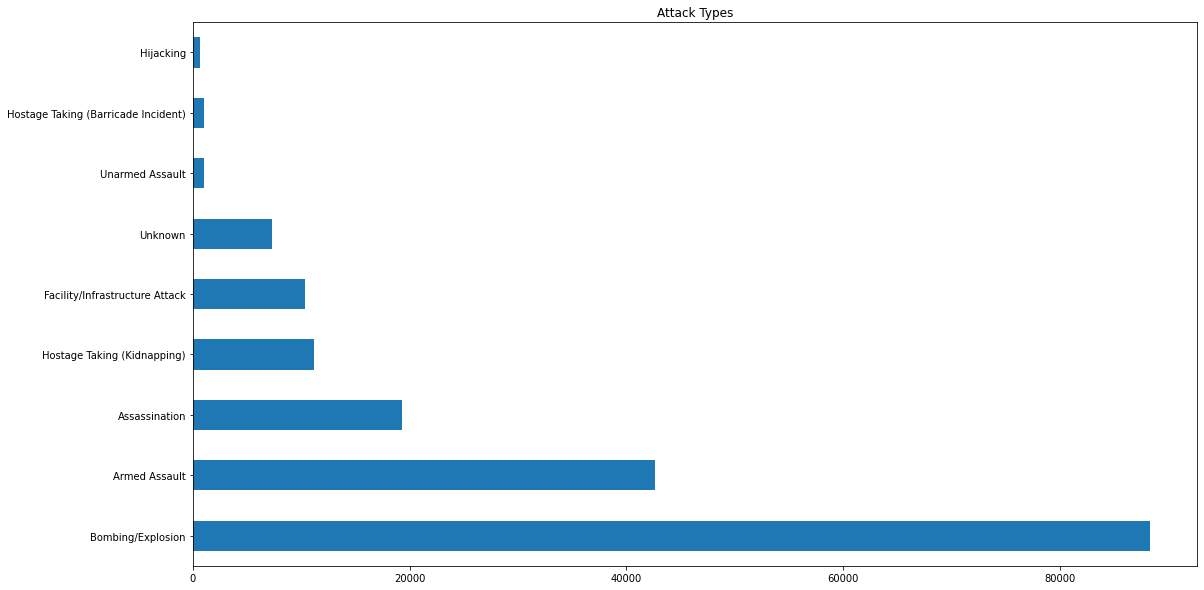

In [41]:
# types of terrorist attacks
df['Attack_type'].value_counts().plot(kind='barh', figsize=[18,10], title='Attack Types')

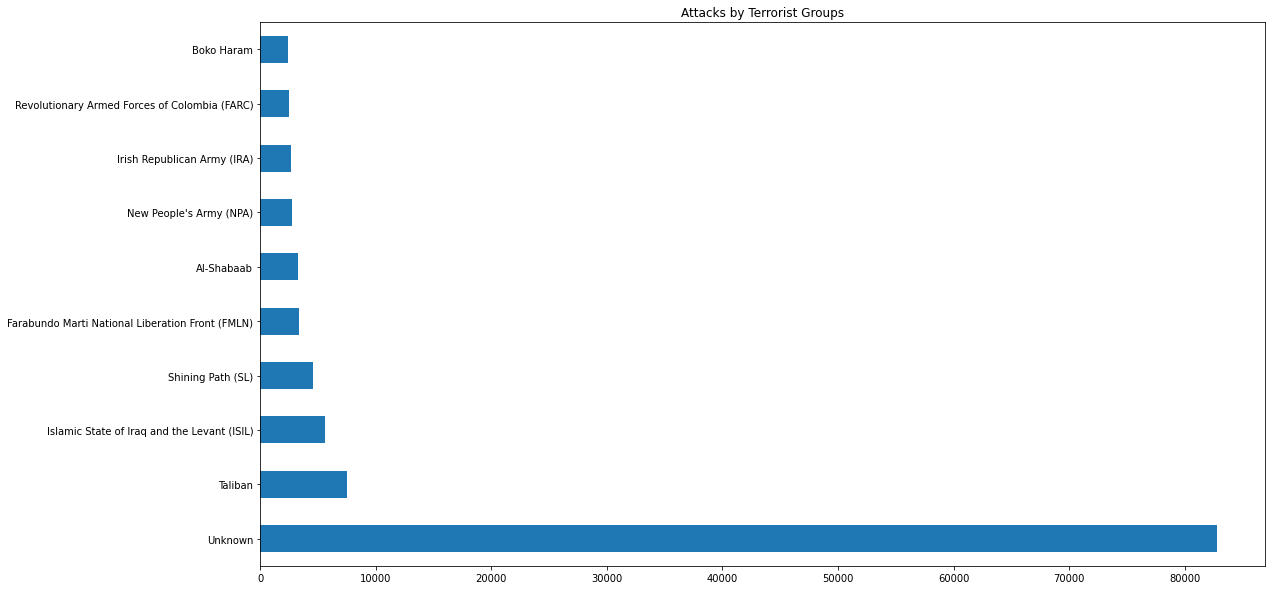

In [42]:
# attacks by terrorist groups
df['Terrorist_group'].value_counts()[:10].plot(kind='barh', figsize=[18,10], title='Attacks by Terrorist Groups')

In [43]:
df.head()

,Year,Month,Day,Country,Region,City,Success,Suicide,Attack_type,Target,Weapon_type,Number_of_killed,Terrorist_group
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,Unknown,1.0,MANO-D
1,1970,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,23rd of September Communist League
2,1970,1,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,1.0,Unknown
3,1970,1,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Explosives,0.0,Unknown
4,1970,1,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,0.0,Unknown


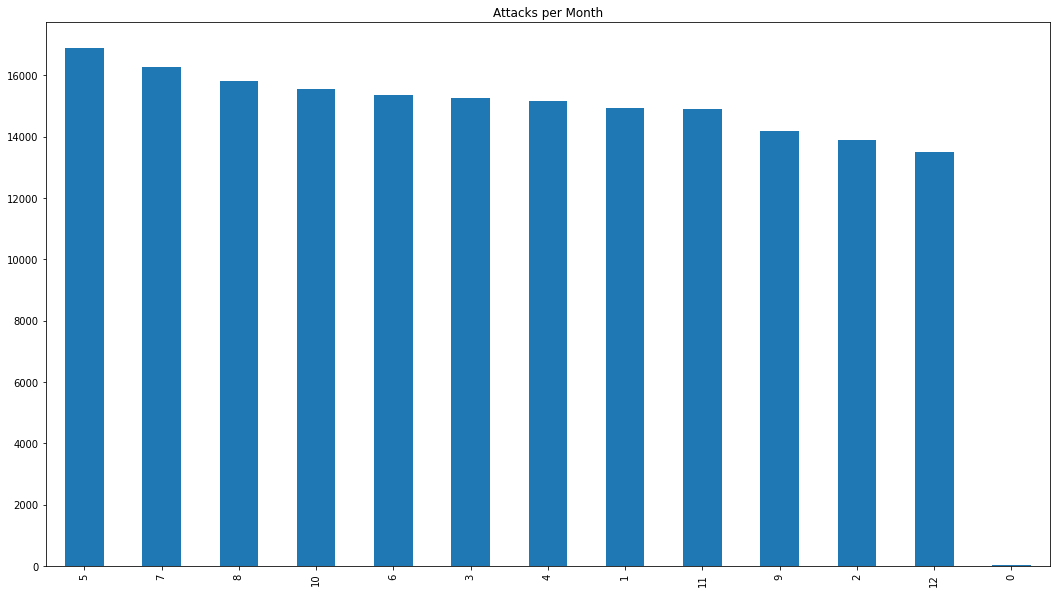

In [44]:
# attacks per month
df['Month'].value_counts().plot(kind='bar', figsize=[18,10], title='Attacks per Month')